In [1]:
import pandas as pd

import numpy as np
from sklearn.linear_model import LinearRegression

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats

In [2]:
tfp = pd.read_csv("tfp-at-constant-national-prices-20111.csv")
tfp = tfp.rename(columns = {"Entity" : "Country"})
tfp = tfp.replace({'United States' : 'USA'}).rename(columns = {"Total factor productivity index (using national accounts) (2017=1)" : "TFP"})
tfp["TFP"] = tfp["TFP"]*100

In [3]:
tfp[tfp['Country'] == 'Russia'].tail()

,Country,Code,Year,TFP
4782,Russia,RUS,2015,98.802555
4783,Russia,RUS,2016,98.866880
4784,Russia,RUS,2017,100.000000
4785,Russia,RUS,2018,101.935399
4786,Russia,RUS,2019,103.138089


In [4]:
pwt = pd.read_excel("pwt100.xlsx", sheet_name = "Data")[["country", "year", "ctfp", "cwtfp", "rtfpna", "rwtfpna"]]

#ctfp	TFP level at current PPPs (USA=1)
#cwtfp	Welfare-relevant TFP levels at current PPPs (USA=1)
#rtfpna	TFP at constant national prices (2017=1)
#rwtfpna	Welfare-relevant TFP at constant national prices (2017=1)

In [5]:
pwt = (pwt
    .rename(columns = {"country" : "Country", "year" : "Year", "rtfpna" : "TFP", "ctfp" : "CTFP", "cwtfp" : "CWTFP", "rwtfpna" : "WTFP"})
    .replace({'United States' : 'USA'}))

pwt[["CTFP", "CWTFP", "TFP", "WTFP"]]= pwt[["CTFP", "CWTFP", "TFP", "WTFP"]] * 100

##Removing USA as value always == 1
v = pwt[pwt["Country"] == "USA"]
v[["ctfp", "cwtfp"]] = np.nan
pwt[pwt["Country"] == "USA"] = v

pwt[pwt["Country"] == "USA"].head(10)

c:\Users\jtleg\miniconda3\lib\site-packages\pandas\core\frame.py:3640: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = value


,Country,Year,CTFP,CWTFP,TFP,WTFP
12110,USA,1950,NaN,NaN,NaN,NaN
12111,USA,1951,NaN,NaN,NaN,NaN
12112,USA,1952,NaN,NaN,NaN,NaN
12113,USA,1953,NaN,NaN,NaN,NaN
12114,USA,1954,100.0,100.0,65.009677,64.128375
12115,USA,1955,100.0,100.0,67.113054,66.248530
12116,USA,1956,100.0,100.0,66.731364,65.639770
12117,USA,1957,100.0,100.0,67.457569,66.202027
12118,USA,1958,100.0,100.0,67.579633,66.899884
12119,USA,1959,100.0,100.0,69.490474,68.800765


In [6]:
WID_Data = pd.read_excel("WID_Data.xlsx", sheet_name = "Data")
WID_Data[WID_Data['Year'] == 2015].head(20)

,Percentile,Year,gptinc_992_j_CH\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nSwitzerland,gptinc_992_j_QM\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nEastern Europe,gptinc_992_j_UY\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nUruguay,gptinc_992_j_SY\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nSyrian Arab Republic,gptinc_992_j_GN\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nGuinea,gptinc_992_j_OE-MER\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nOther MENA (at market exchange rate),gptinc_992_j_MW\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nMalawi,gptinc_992_j_MN\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nMongolia,...,sptinc_992_j_SN\nPre-tax national income \nBottom 50% | share | adults | equal split\nSenegal,sptinc_992_j_MG\nPre-tax national income \nBottom 50% | share | adults | equal split\nMadagascar,sptinc_992_j_CD\nPre-tax national income \nBottom 50% | share | adults | equal split\nDR Congo,sptinc_992_j_PL\nPre-tax national income \nBottom 50% | share | adults | equal split\nPoland,sptinc_992_j_EE\nPre-tax national income \nBottom 50% | share | adults | equal split\nEstonia,sptinc_992_j_QT-MER\nPre-tax national income \nBottom 50% | share | adults | equal split\nSouth Africa (at market exchange rate),sptinc_992_j_PG\nPre-tax national income \nBottom 50% | share | adults | equal split\nPapua New Guinea,sptinc_992_j_QO-MER\nPre-tax national income \nBottom 50% | share | adults | equal split\nNorth Africa (at market exchange rate),sptinc_992_j_QF-MER\nPre-tax national income \nBottom 50% | share | adults | equal split\nOceania (at market exchange rate),sptinc_992_j_ID\nPre-tax national income \nBottom 50% | share | adults | equal split\nIndonesia
65,pall,2015,0.432388,0.501557,0.540364,0.651422,0.538078,0.726932,0.651527,0.559097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,p0p50,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1338,0.1248,0.1264,0.1984,0.1729,0.0581,0.1297,0.1327,0.1171,0.1475
209,p50p90,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3891,0.3676,0.3852,0.4238,0.4692,0.2879,0.4082,0.3860,0.5114,0.4028
281,p90p100,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4771,0.5076,0.4884,0.3778,0.3579,0.6540,0.4621,0.4813,0.3714,0.4497
353,p99p100,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1318,0.1517,0.1463,0.1491,0.1114,0.1938,0.1628,0.1690,0.1296,0.1808


In [7]:
WID_G = WID_Data.iloc[:, 0:250]
WID_G = WID_G[WID_G.Percentile == 'pall'].drop(['Percentile'], axis = 1)
WID_G.head()

,Year,gptinc_992_j_CH\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nSwitzerland,gptinc_992_j_QM\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nEastern Europe,gptinc_992_j_UY\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nUruguay,gptinc_992_j_SY\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nSyrian Arab Republic,gptinc_992_j_GN\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nGuinea,gptinc_992_j_OE-MER\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nOther MENA (at market exchange rate),gptinc_992_j_MW\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nMalawi,gptinc_992_j_MN\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nMongolia,gptinc_992_j_SK\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nSlovakia,...,gptinc_992_j_SN\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nSenegal,gptinc_992_j_MG\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nMadagascar,gptinc_992_j_CD\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nDR Congo,gptinc_992_j_PL\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nPoland,gptinc_992_j_EE\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nEstonia,gptinc_992_j_QT-MER\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nSouth Africa (at market exchange rate),gptinc_992_j_PG\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nPapua New Guinea,gptinc_992_j_QO-MER\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nNorth Africa (at market exchange rate),gptinc_992_j_QF-MER\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nOceania (at market exchange rate),gptinc_992_j_ID\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nIndonesia
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
WID_G1 = WID_G
WID_G1 = WID_G1.melt(id_vars=["Year"], 
        var_name="Country", 
        value_name="Gini")

In [9]:
WID_G2 = WID_G1
WID_G2['Country'] = WID_G2['Country'].str.split('\n').str[3]
WID_G2 = WID_G2.replace({'Russian Federation' : 'Russia'})
WID_G2['Gini'] = WID_G2["Gini"]*100
WID_G2[WID_G2['Country'] == 'Russia']

,Year,Country,Gini
3024,1950,Russia,NaN
3025,1951,Russia,NaN
3026,1952,Russia,NaN
3027,1953,Russia,NaN
3028,1954,Russia,NaN
...,...,...,...
3091,2017,Russia,54.281500
3092,2018,Russia,54.937748
3093,2019,Russia,55.032124
3094,2020,Russia,55.032124


In [10]:
#tfp_gini = pd.concat([tfp, WID_G2], axis=1, join="inner")
tfp_gini = pwt.merge(WID_G2, on = ['Country', 'Year'])
tfp_gini = tfp_gini[tfp_gini["Country"] != "South Africa"] ## Why is SA in the dataset twice

# Normalize Gini Coefficient
tfp_gini["NGini"] = np.nan
tfp_gini["-Gini"] = np.nan
tfp_gini["dGini"] = np.nan
tfp_gini["dpGini"] = np.nan
tfp_gini["dNGini"] = np.nan

# Find the changes tfp and gini
tfp_gini["dTFP"] = np.nan
tfp_gini["dpTFP"] = np.nan
tfp_gini["dpTFPm1"] = np.nan
tfp_gini["dpTFPm2"] = np.nan
tfp_gini["dpTFPavg"] = np.nan
tfp_gini["-dpTFP^2"] = np.nan
tfp_gini["dpTFP^2"] = np.nan
tfp_gini["dpTFP^3"] = np.nan
tfp_gini["log(dpTFP)"] = np.nan

tfp_gini["dCTFP"] = np.nan
tfp_gini["dpCTFP"] = np.nan
tfp_gini["dCTFPm1"] = np.nan
tfp_gini["dCTFPm2"] = np.nan
tfp_gini["dCTFPavg"] = np.nan
tfp_gini["-dpCTFP^2"] = np.nan
tfp_gini["dpCTFP^2"] = np.nan
tfp_gini["dpCTFP^3"] = np.nan

tfp_gini["dWTFP"] = np.nan
tfp_gini["dWTFPm1"] = np.nan
tfp_gini["dWTFPm2"] = np.nan
tfp_gini["dWTFPavg"] = np.nan
tfp_gini["-dWTFP^2"] = np.nan
tfp_gini["dWTFP^2"] = np.nan
tfp_gini["dWTFP^3"] = np.nan



for x in tfp_gini["Country"].unique():
    temp = tfp_gini[tfp_gini["Country"] == x]

    b = float(temp.loc[temp["Year"] == 2017, "Gini"])
    temp["NGini"] = temp["Gini"].div(b) * 100

    temp["-Gini"] = temp["Gini"] - temp["Gini"].min()

    temp.dGini = temp['Gini'].diff(periods=1)
    temp.dpGini = temp['dGini'].div(temp['Gini']) * 100
    temp.dNGini = temp['NGini'].diff(periods=1)

    temp["dTFP"] = temp['TFP'].diff(periods=1)
    temp["dpTFP"] = temp['dTFP'].div(temp['TFP'])*100
    temp["dpTFPm1"] = temp.dpTFP.shift(+1)
    temp["dpTFPm2"] = temp.dpTFPm1.shift(+1)
    temp["dpTFPavg"] = (temp["dpTFP"] + temp["dpTFPm1"] + temp["dpTFPm2"]).div(3)
    temp["-dpTFP^2"] = temp.dTFP*abs(temp.dTFP)
    temp["dpTFP^2"] = temp.dpTFP ** 2
    temp["dpTFP^3"] = temp.dpTFP ** 3
    temp["log(dpTFP)"] = np.log(temp["dpTFP"])

    temp["dCTFP"] = temp['CTFP'].diff(periods=1)
    temp["dpCTFP"] = temp['dCTFP'].div(temp['CTFP'])*100
    temp["dCTFPm1"] = temp.dCTFP.shift(+1)
    temp["dCTFPm2"] = temp.dCTFPm1.shift(+1)
    temp["dCTFPavg"] = (temp["dCTFP"] + temp["dCTFPm1"] + temp["dCTFPm2"]).div(3)
    temp["-dpCTFP^2"] = temp.dCTFP*abs(temp.dCTFP)
    temp["dpCTFP^2"] = temp.dpCTFP ** 2 
    temp["dpCTFP^3"] = temp.dpCTFP ** 3

    temp["dWTFP"] = temp['WTFP'].diff(periods=1)
    temp["dWTFPm1"] = temp.dWTFP.shift(+1)
    temp["dWTFPm2"] = temp.dWTFPm1.shift(+1)
    temp["dWTFPavg"] = (temp["dWTFP"] + temp["dWTFPm1"] + temp["dWTFPm2"]).div(3)
    temp["-dWTFP^2"] = temp.dWTFP*abs(temp.dWTFP)
    temp["dWTFP^2"] = temp.dWTFP ** 2
    temp["dWTFP^3"] = temp.dWTFP ** 3

    tfp_gini[tfp_gini["Country"] == x] = temp

C:\Users\jtleg\AppData\Local\Temp/ipykernel_13128/1675886138.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["NGini"] = temp["Gini"].div(b) * 100
C:\Users\jtleg\AppData\Local\Temp/ipykernel_13128/1675886138.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["-Gini"] = temp["Gini"] - temp["Gini"].min()
c:\Users\jtleg\miniconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [11]:
##Add GDP per capita before removing years
GDPpc_Data = (pd.read_excel("mpd2020.xlsx", sheet_name = "Full data")
                .drop(columns = ["pop", "countrycode"])
                .rename(columns = {"gdppc" : "GDPPC", "country" : "Country", "year" : "Year"})
                .replace({'United States' : 'USA'}))
#GDPpc_Data.head()
TGall = tfp_gini.merge(GDPpc_Data, on = ['Country', 'Year'], how = 'left')

TGall["dGDPPC"] = np.nan
TGall["dpGDPPC"] = np.nan
TGall["dpGDPPC^2"] = np.nan

##Differnece in GDPpc_Data
for x in TGall["Country"].unique():
    temp = TGall[TGall["Country"] == x]

    temp["dGDPPC"] = temp['GDPPC'].diff(periods=1)
    temp["dpGDPPC"] = temp["dGDPPC"].div(temp['GDPPC'])*100
    temp["dpGDPPC^2"] = temp["dpGDPPC"] ** 2

    TGall[TGall["Country"] == x] = temp

C:\Users\jtleg\AppData\Local\Temp/ipykernel_13128/2619216976.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["dGDPPC"] = temp['GDPPC'].diff(periods=1)
C:\Users\jtleg\AppData\Local\Temp/ipykernel_13128/2619216976.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["dpGDPPC"] = temp["dGDPPC"].div(temp['GDPPC'])*100
C:\Users\jtleg\AppData\Local\Temp/ipykernel_13128/2619216976.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [12]:
TGall['Gini'].min()

20.803111738121498

https://ourworldindata.org/taxation 

In [13]:
tmitr = (pd.read_csv("top-income-tax-rates-piketty.csv")
        .rename(columns = {"Entity" : "Country", "Top marginal income tax rate (WIR (2018))": "TMITR"})
        .drop(columns = "Code")
        .replace({'United States' : 'USA'}))

TGall = TGall.merge(tmitr, on = ['Country', 'Year'], how = 'left')

In [14]:
TGall[["dpTFP", "dpTFPm1", "dpTFPm2"]].tail()

,dpTFP,dpTFPm1,dpTFPm2
10565,-1.824487,-1.446923,-1.562842
10566,-1.953656,-1.824487,-1.446923
10567,1.948935,-1.953656,-1.824487
10568,1.783884,1.948935,-1.953656
10569,-10.957297,1.783884,1.948935


https://ourworldindata.org/taxation

https://stats.oecd.org/viewhtml.aspx?datasetcode=TABLE_I7&lang=en 

In [15]:
TMITR = (pd.read_csv("TMITR.csv")
        .drop(columns = ["COU", "YEA", "Unit Code", "Unit", "PowerCode Code", "PowerCode", "Reference Period Code", "Reference Period", "Flag Codes", "Flags"]))
TMITR = (TMITR[TMITR["TAX"] == "TOP_TRATE"]
        .drop(columns = ["TAX", "Income Tax"])
        .rename(columns = {"Value" : "TMITR2"})
        .replace({'United States' : 'USA'}))
TGall = TGall.merge(TMITR, on = ['Country', 'Year'], how = 'left')

In [16]:
pd.get_dummies(TGall["Country"])

,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Viet Nam,Yemen,Zambia,Zimbabwe
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
## State Fixed Effects
TGallFE = pd.concat([TGall, pd.get_dummies(TGall["Country"])], axis = 1)

In [18]:
TGallFE.iloc[:,TGallFE.columns.get_loc("Albania"):].tail()

,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Viet Nam,Yemen,Zambia,Zimbabwe
10565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
def cd(country = "Canada"):
    return tfp_gini[tfp_gini['Country'] == country]

In [20]:
def all(country = "Canada"):
        return TGall[TGall['Country'] == country]

In [21]:
def TGC(vars = ["TFP", "Gini", "-Gini", "dpTFP", "dpGini", "dNGini"], FE = False, Year = False):
    TGallD = TGall[vars]
    if Year == True:
        TGallD = pd.concat([TGall["Year"], TGallD], axis = 1)
    if FE == True:
        TGallD = pd.concat([TGallD, pd.get_dummies(TGall["Country"])], axis = 1)
    #if d == True:
    #    TGallD = pd.concat([TGall["dpGDPPC"], TGallD], axis = 1)
    #if 'dGini' in TGallD.columns:
    #    TGallD = pd.concat([TGallD[TGallD["dGini"] < -.01], TGallD[TGallD["dGini"] > .01]])
    TGallD = TGallD.dropna()
    TGallD = TGallD[(np.abs(stats.zscore(TGallD[vars])) < 3).all(axis=1)]
    return TGallD

In [22]:
def TGCc(vars = ["TFP", "Gini", "NGini", "-Gini", "dTFP", "dGini", "dNGini", "dTFPavg"], country = "Canada"):
    TGallD = TGall[TGall['Country'] == country]
    TGallD = TGallD[vars].dropna()
    #if 'dGini' in TGallD.columns:
    #    TGallD = pd.concat([TGallD[TGallD["dGini"] < -.01], TGallD[TGallD["dGini"] > .01]])
    TGallD = TGallD[(np.abs(stats.zscore(TGallD)) < 3).all(axis=1)]
    return TGallD

In [23]:
# TGCc(["CTFP", "TFP", "dCTFP", "dTFP", "dpCTFP", "dpTFP"], country = "Canada").tail(15).to_excel("dTFP_Canada.xlsx")

In [24]:
print(len(TGall))
#Need to compare country names
print(len(tfp_gini))

10570
10570


In [25]:
#all("Canada")
TGall

,Country,Year,CTFP,CWTFP,TFP,WTFP,Gini,NGini,-Gini,dGini,...,dWTFPavg,-dWTFP^2,dWTFP^2,dWTFP^3,GDPPC,dGDPPC,dpGDPPC,dpGDPPC^2,TMITR,TMITR2
0,Angola,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1677.0000,NaN,NaN,NaN,NaN,NaN
1,Angola,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1715.0000,38.0000,2.215743,4.909519,NaN,NaN
2,Angola,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1755.0000,40.0000,2.279202,5.194763,NaN,NaN
3,Angola,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1795.0000,40.0000,2.228412,4.965821,NaN,NaN
4,Angola,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1720.0000,-75.0000,-4.360465,19.013656,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10565,Zimbabwe,2015,38.663211,44.712487,99.966645,108.112156,63.201501,99.404908,0.757168,0.189233,...,0.267450,159.362404,159.362404,2011.772232,1560.0000,-34.0000,-2.179487,4.750164,NaN,NaN
10566,Zimbabwe,2016,38.564241,42.306349,98.051065,98.829550,63.390703,99.702490,0.946370,0.189202,...,0.565916,-86.166790,86.166790,-799.852432,1534.0000,-26.0000,-1.694915,2.872738,NaN,NaN
10567,Zimbabwe,2017,40.277901,43.239212,100.000000,100.000000,63.579859,100.000000,1.135527,0.189157,...,1.503909,1.369954,1.369954,1.603464,1582.3662,48.3662,3.056574,9.342647,NaN,NaN
10568,Zimbabwe,2018,38.205928,41.876650,101.816285,97.741020,66.051709,103.887787,3.607376,2.471850,...,-3.457046,-5.102992,5.102992,-11.527558,1611.4052,29.0390,1.802092,3.247535,NaN,NaN


In [26]:
len(tfp_gini["Country"].unique())

151

In [27]:
cd("Serbia").tail()

,Country,Year,CTFP,CWTFP,TFP,WTFP,Gini,NGini,-Gini,dGini,...,-dpCTFP^2,dpCTFP^2,dpCTFP^3,dWTFP,dWTFPm1,dWTFPm2,dWTFPavg,-dWTFP^2,dWTFP^2,dWTFP^3
8815,Serbia,2015,57.224178,58.683705,101.622319,103.525651,54.594783,108.225520,11.469250,-1.032636,...,11.004417,33.605309,194.810265,-0.618899,-8.315182,-8.196032,-5.710038,-0.383036,0.383036,-0.237060
8816,Serbia,2016,54.320151,54.985726,100.737071,99.764228,55.482447,109.985174,12.356915,0.887664,...,-8.433377,28.581142,-152.798597,-3.761423,-0.618899,-8.315182,-4.231834,-14.148300,14.148300,-53.217737
8817,Serbia,2017,53.757489,54.987979,100.000000,100.000000,50.445388,100.000000,7.319855,-5.037060,...,-0.316588,1.095512,-1.146636,0.235772,-3.761423,-0.618899,-1.381516,0.055588,0.055588,0.013106
8818,Serbia,2018,53.174329,55.680108,101.566768,102.922392,48.393257,95.931976,5.267725,-2.052130,...,-0.340075,1.202739,-1.319037,2.922392,0.235772,-3.761423,-0.201086,8.540374,8.540374,24.958321
8819,Serbia,2019,53.560597,56.793004,102.820683,106.085467,48.398910,95.943182,5.273377,0.005653,...,0.149203,0.520099,0.375085,3.163075,2.922392,0.235772,2.107080,10.005046,10.005046,31.646716


In [28]:
tfp_giniCC = tfp_gini.dropna()
CC = TGall.dropna()

We could build a model for inequality without gdp or income

# More Variable

In [29]:
# Using pairplot we'll visualize the data for correlation
#sns.pairplot(tfp_gini, x_vars=['TFP', 'Gini'], 
#            y_vars='Country', size=20, aspect=.5, kind='scatter')
#plt.show()

c:\Users\jtleg\miniconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


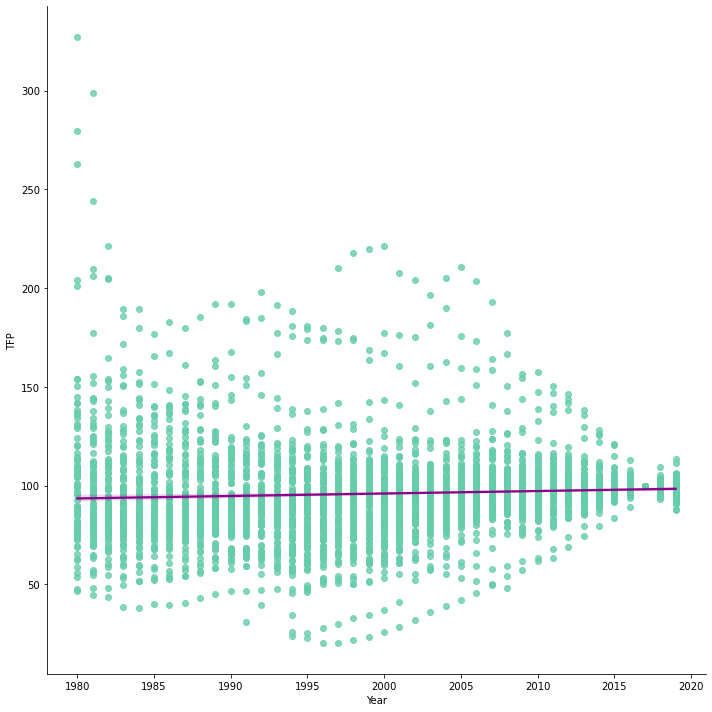

In [30]:
sns.lmplot(data=TGall[TGall["Year"] >= 1980], x="Year", y="TFP", line_kws={'color': 'darkmagenta'}, scatter_kws = {'color' : 'mediumaquamarine'}, size = 10)

c:\Users\jtleg\miniconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


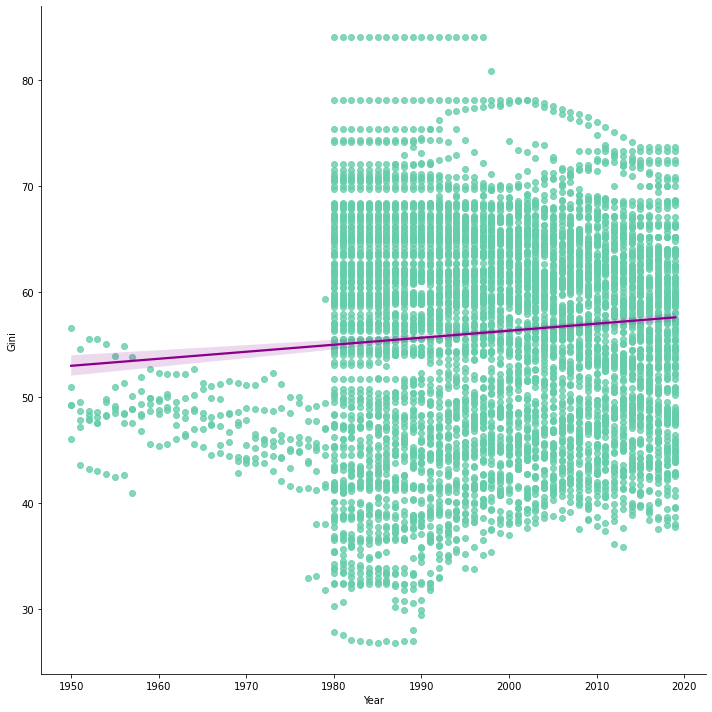

In [31]:
sns.lmplot(data=TGC(["Gini"],Year = True), x="Year", y="Gini", line_kws={'color': 'darkmagenta'}, scatter_kws = {'color' : 'mediumaquamarine'}, size = 10)

c:\Users\jtleg\miniconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


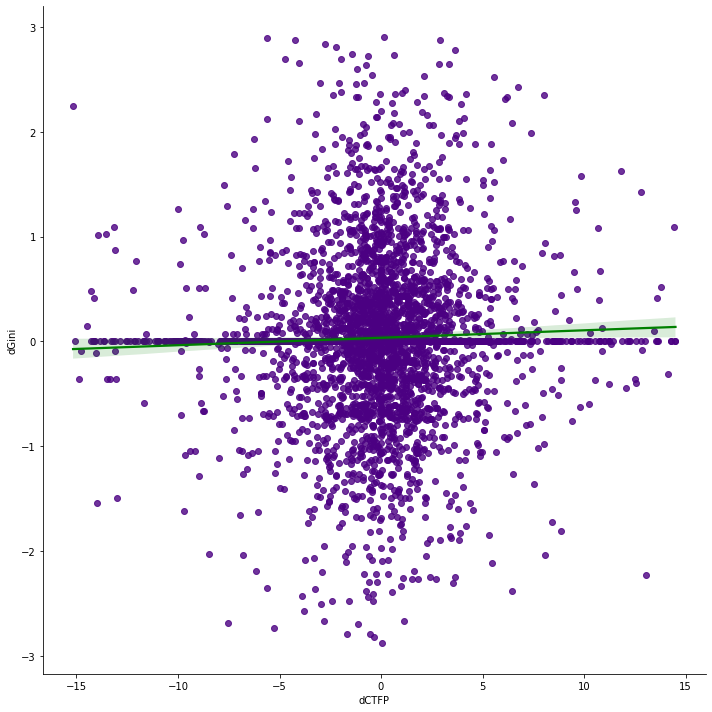

In [32]:
#sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")
sns.lmplot(data=TGC(["dCTFP", "dGini"]), x="dCTFP", y="dGini", line_kws={'color': 'green'}, scatter_kws = {'color' : 'indigo'}, size = 10)

c:\Users\jtleg\miniconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


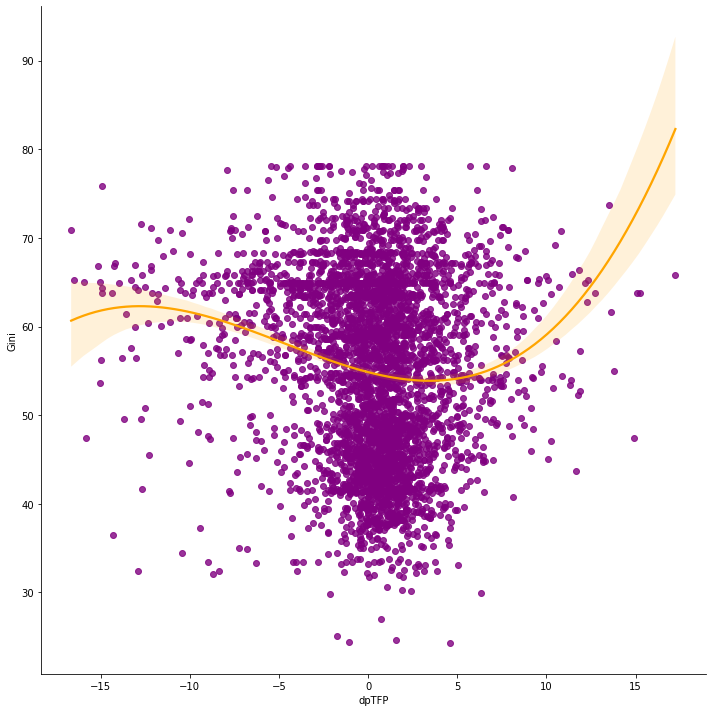

In [33]:
sns.lmplot(data=TGC(["dpTFP", "Gini"]), x="dpTFP", y="Gini", order = 3, line_kws={'color': 'orange'}, scatter_kws = {'color' : 'purple'}, size = 10)

c:\Users\jtleg\miniconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


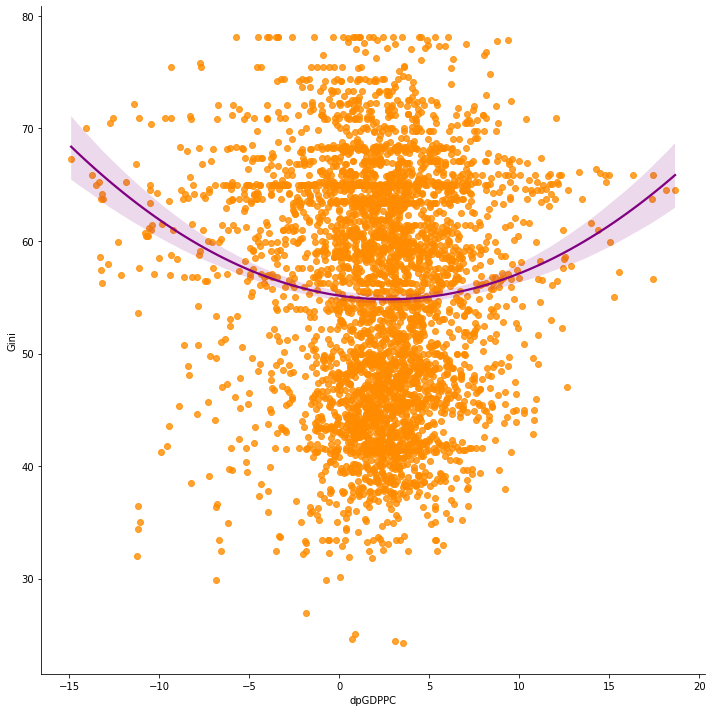

In [34]:
sns.lmplot(data=TGC(["dpTFP", "dpGDPPC", "Gini"]), x="dpGDPPC", y="Gini", order = 2, line_kws={'color': 'purple'}, scatter_kws = {'color' : 'darkorange'}, size = 10)

In [35]:
TGC(["dpTFP", "dpGDPPC", "Gini"])

,dpTFP,dpGDPPC,Gini
30,0.100873,0.326371,59.894040
31,-7.358551,-4.146839,59.894049
32,-3.047237,-7.059680,59.894046
33,1.450998,-6.677019,59.894046
34,2.812210,-2.303415,59.894047
...,...,...,...
10564,-1.446923,-0.627353,63.012267
10565,-1.824487,-2.179487,63.201501
10566,-1.953656,-1.694915,63.390703
10567,1.948935,3.056574,63.579859


c:\Users\jtleg\miniconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


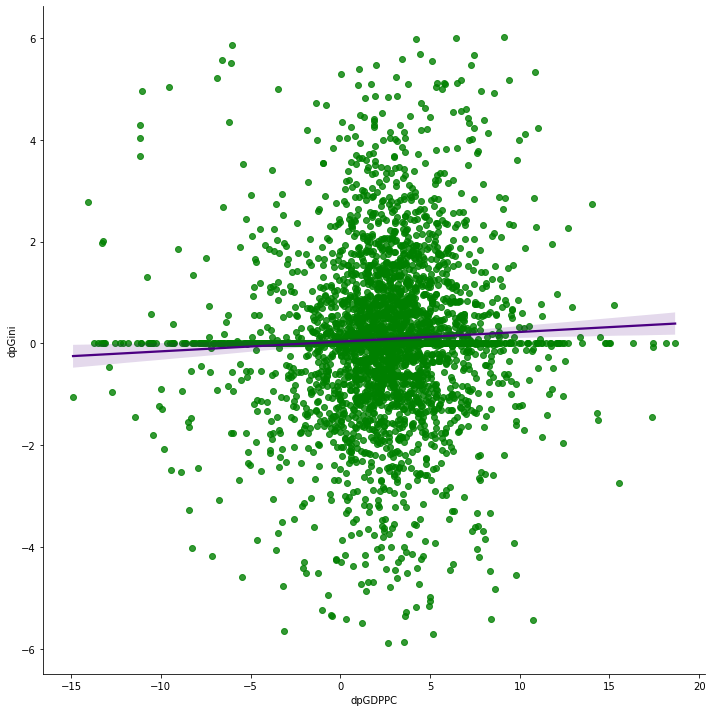

In [36]:
sns.lmplot(data=TGC(["dpTFP", "dpGDPPC", "dpGini"]), x="dpGDPPC", y="dpGini", line_kws={'color': 'indigo'}, scatter_kws = {'color' : 'green'}, size = 10)

c:\Users\jtleg\miniconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


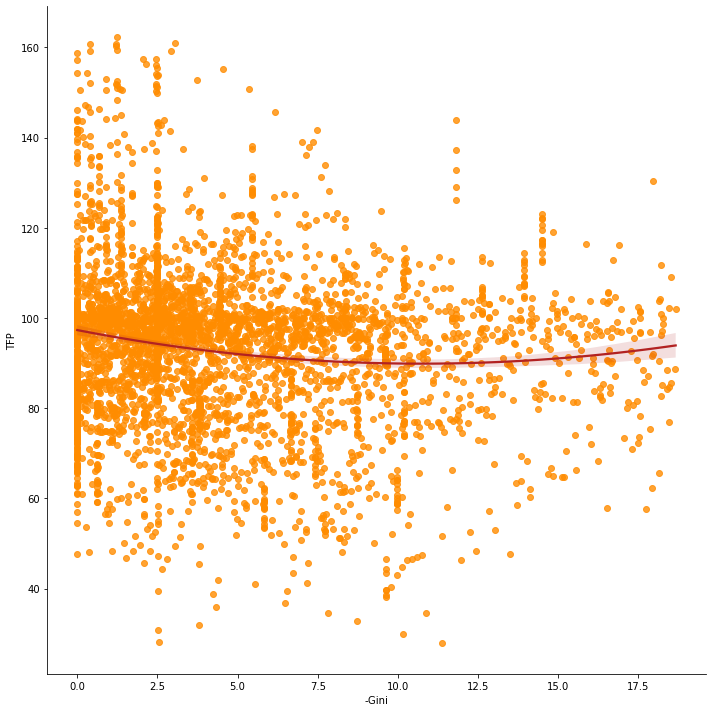

In [37]:
sns.lmplot(data=TGC(["TFP", "-Gini"]), y="TFP", x="-Gini", order = 2, line_kws={'color': 'firebrick'}, scatter_kws = {'color' : 'darkorange'}, size = 10)


c:\Users\jtleg\miniconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


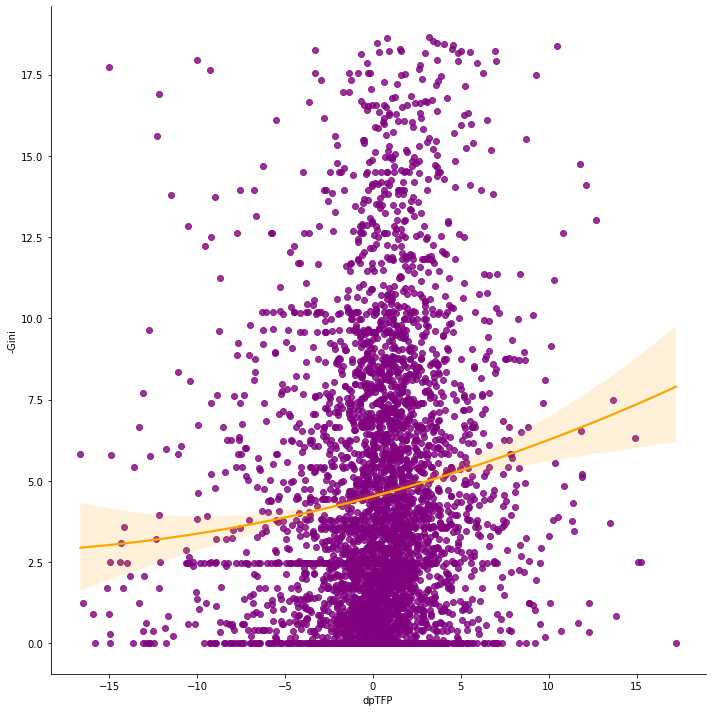

In [38]:
sns.lmplot(data=TGC(["dpTFP", "-Gini"]), x="dpTFP", y="-Gini", order = 2, line_kws={'color': 'orange'}, scatter_kws = {'color' : 'purple'}, size = 10)

c:\Users\jtleg\miniconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


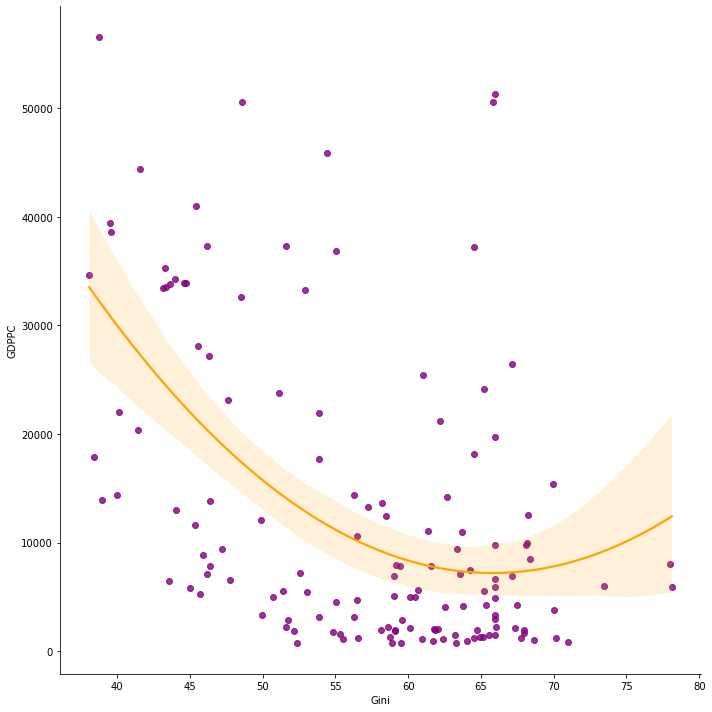

In [39]:
sns.lmplot(data=TGall[TGall["Year"] == 2001], y="GDPPC", x="Gini", order = 2, line_kws={'color': 'orange'}, scatter_kws = {'color' : 'purple'}, size = 10)

In [40]:
# sns.lmplot(data=cd(), x="TFP", y="Gini")

In [41]:
"""
from scipy import stats
penguins = sns.load_dataset("penguins")

sns.jointplot(data=cd(), x="TFP", y="Gini", kind = "reg")
"""

'\nfrom scipy import stats\npenguins = sns.load_dataset("penguins")\n\nsns.jointplot(data=cd(), x="TFP", y="Gini", kind = "reg")\n'

## dTFP and dGini
https://stackoverflow.com/questions/25579227/seaborn-lmplot-with-equation-and-r2-text

In [42]:
#def r2(x, y):
#    return stats.pearsonr(x, y)[0] ** 2

# r2(CC.dgdppc, CC.dGini)

In [43]:
#sns.regplot(data=tfp_gini, x="dTFP", y="Gini")

In [44]:
# mmm = sns.regplot(data=tfp_gini, x="dTFP", y="dGini", order=2)

# ML Regression

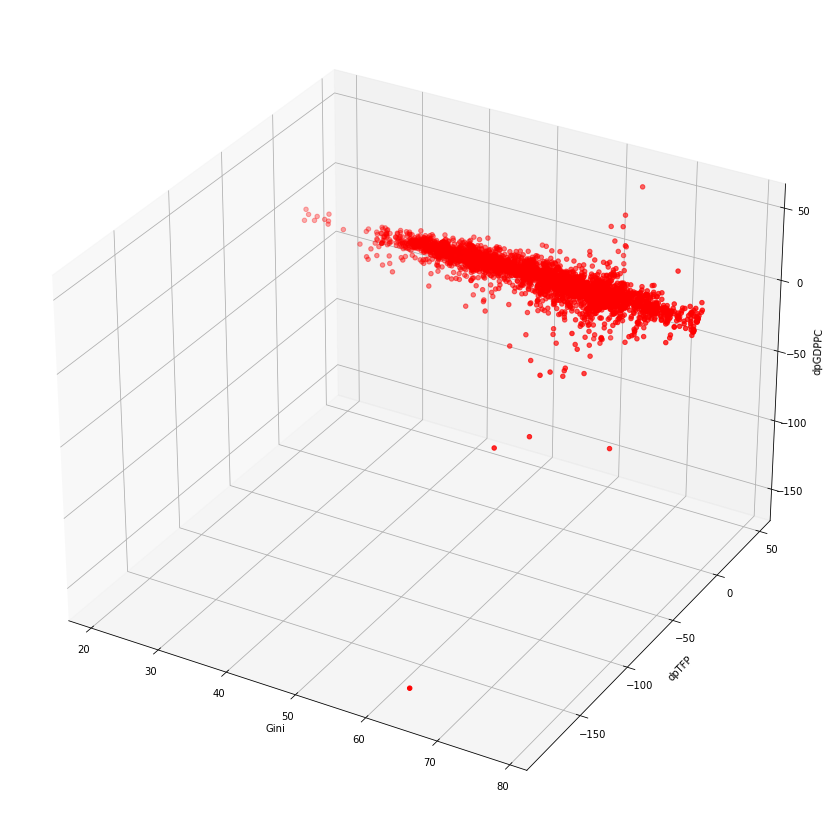

In [45]:
from ctypes import sizeof


fig=plt.figure(figsize=(15, 15))
ax=fig.add_subplot(111,projection='3d')
n=100
ax.scatter(TGall["Gini"],TGall["dpTFP"],TGall["dpGDPPC"],color="red")
ax.set_xlabel("Gini")
ax.set_ylabel("dpTFP")
ax.set_zlabel("dpGDPPC")
plt.show()

In [46]:
#enerating training and testing data from our data:
# We are using 80% data for training.
train = tfp_giniCC[tfp_gini["Country"] != "Canada"]
test = cd("Canada")

# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[["dTFP"]])
train_y = np.array(train[["dGini"]])
regr.fit(train_x,train_y)

C:\Users\jtleg\AppData\Local\Temp/ipykernel_13128/3062030121.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train = tfp_giniCC[tfp_gini["Country"] != "Canada"]


LinearRegression()

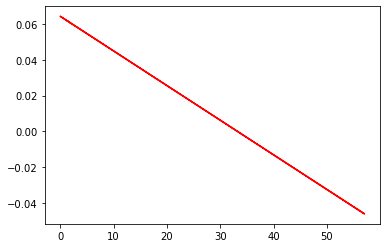

In [47]:
ax.scatter(TGall["Gini"],TGall["dpTFP^2"],TGall["dpGDPPC^2"],color="red")
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r',)
ax.set_xlabel("Gini")
ax.set_ylabel("dpTFP^2")
ax.set_zlabel("dpGDPPC^2")
plt.show()

In [48]:
print ("coefficients : ",regr.coef_) #Slope
print ("Intercept : ",regr.intercept_)

coefficients :  [[-0.0019343]]
Intercept :  [0.06431151]


In [49]:
"""
# Predicting values:
# Function for predicting future values
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

# Checking various accuracy:
from sklearn.metrics import r2_score 
test_x = np.array(test[['dTFP']]) 
test_y = np.array(test[['dGini']]) 
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
"""

'\n# Predicting values:\n# Function for predicting future values\ndef get_regression_predictions(input_features,intercept,slope):\n    predicted_values = input_features*slope + intercept\n    return predicted_values\n\n# Checking various accuracy:\nfrom sklearn.metrics import r2_score \ntest_x = np.array(test[[\'dTFP\']]) \ntest_y = np.array(test[[\'dGini\']]) \ntest_y_ = regr.predict(test_x)\nprint("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))\nprint("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)** 2))\nprint("R2-score: %.2f" % r2_score(test_y_ , test_y) )\n'

# Machine learning 2
https://towardsdatascience.com/multivariate-linear-regression-in-python-step-by-step-128c2b127171

In [50]:
X = tfp_giniCC[["dTFP"]]
y = tfp_giniCC["dGini"]
X.head()

,dTFP
33,1.187474
34,2.368063
35,1.353186
36,1.868296
37,4.503179


In [51]:
#Initiate the theta values.
theta = np.array([0]*len(X.columns))

#number of training data
m = len(X)

def hypothesis(theta, X):
    return theta*X

#Define the cost function
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*47)

In [52]:
##Gradient descent
def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(int(sum((y1-y)*X.iloc[:,c])/len(X)))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [53]:
J, j, theta = gradientDescent(X, y, theta, 0.05, 1000)

In [54]:
#Predict Outputs
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)
y

33       6.053596e-07
34       8.381903e-07
35      -4.004687e-06
36       4.272442e-06
37      -4.505273e-06
             ...     
10700   -3.608119e-01
10701   -3.609214e-01
10702    1.893501e-01
10707    1.891565e-01
10708    2.471850e+00
Name: dGini, Length: 2330, dtype: float64

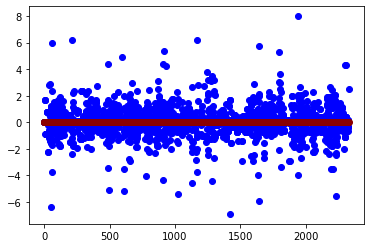

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x = list(range(0, len(y))), y= y, color='blue')         
plt.scatter(x=list(range(0, len(y))), y=y_hat, color='darkred')
plt.show()

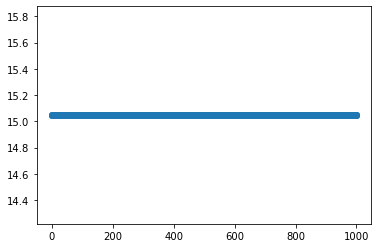

In [56]:
#cost of each iteration
plt.figure()
plt.scatter(x=list(range(0, 1000)), y=J)
plt.show()

## Simple Linear Regression

In [57]:
model = LinearRegression()
dTFP = tfp_giniCC['dTFP'].array.reshape((-1, 1))
dGini = tfp_giniCC['dGini'].array
model.fit(dTFP, dGini)
model = LinearRegression().fit(dTFP,dGini)

In [58]:
## R^2
r_sq = model.score(dTFP, dGini)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 4.0425402243582376e-05


In [59]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: 0.06639539132788845
slope: [-0.00211014]


https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

In [60]:
X = TGall[["dpTFP", "Year", "dpGini"]].dropna()
X2 = sm.add_constant(X.drop(columns = ["dpGini"]))
est = sm.OLS(X.dpGini, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 dpGini   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.528
Date:                Wed, 16 Nov 2022   Prob (F-statistic):             0.0109
Time:                        19:33:51   Log-Likelihood:                -8433.9
No. Observations:                4008   AIC:                         1.687e+04
Df Residuals:                    4005   BIC:                         1.689e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7706      4.899      2.402      0.0

c:\Users\jtleg\miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [61]:
X = TGC(["dpTFP", "dpTFP^2", "dpGini"], Year = False)
X2 = sm.add_constant(X.drop(columns = ["dpGini"]))
est = sm.OLS(X.dpGini, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 dpGini   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.964
Date:                Wed, 16 Nov 2022   Prob (F-statistic):             0.0517
Time:                        19:33:51   Log-Likelihood:                -7158.5
No. Observations:                3884   AIC:                         1.432e+04
Df Residuals:                    3881   BIC:                         1.434e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0715      0.027      2.627      0.0

c:\Users\jtleg\miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Extremly predictive, dTFP on Gini

run on several years avg

Taxes, democracy, news freedom as control variable

In [62]:
#TGall.tail().drop(columns = ["Year", "Country", ])
TGall["GDPPC"].mean()

10275.698980251966

In [63]:
X = TGC(["dpTFP", "dpGini", "TMITR"], Year = False, FE = False)
X2 = sm.add_constant(X.drop(columns = ["dpGini"]))
est = sm.OLS(X.dpGini, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 dpGini   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.686
Date:                Wed, 16 Nov 2022   Prob (F-statistic):             0.0266
Time:                        19:33:51   Log-Likelihood:                -426.36
No. Observations:                 230   AIC:                             858.7
Df Residuals:                     227   BIC:                             869.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3424      0.416      3.230      0.0

c:\Users\jtleg\miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [64]:
X = TGC(["dpTFP", "dpTFP^2", "TMITR", "Gini"], Year = False)
X2 = sm.add_constant(X.drop(columns = ["Gini"]))
est = sm.OLS(X.Gini, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Gini   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     20.62
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           7.40e-12
Time:                        19:33:51   Log-Likelihood:                -647.78
No. Observations:                 232   AIC:                             1304.
Df Residuals:                     228   BIC:                             1317.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.5544      1.060     52.400      0.0

c:\Users\jtleg\miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [65]:
#Average standard deviation per gini coefficient
std = 0
for x in tfp_gini["Country"].unique():
    temp = TGCc(["Gini"], country = x)
    std += temp["Gini"].std()

print(std / tfp_gini["Country"].unique().size)


2.6345836692544196


In [66]:
tfp_gini.Gini.std()

10.125922722310913

In [67]:
# Avg std for dNGini
std = 0
for x in tfp_gini["Country"].unique():
    temp = TGCc(["dNGini"], country = x)
    std += temp["dNGini"].std()

print(std / tfp_gini["Country"].unique().size)

1.2514238751040614


In [68]:
X = TGC(["dCTFP", "dNGini"])
X2 = sm.add_constant(X.drop(columns = ("dNGini")))
est = sm.OLS(X.dNGini, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 dNGini   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.109
Date:                Wed, 16 Nov 2022   Prob (F-statistic):             0.0135
Time:                        19:33:56   Log-Likelihood:                -6973.4
No. Observations:                3839   AIC:                         1.395e+04
Df Residuals:                    3837   BIC:                         1.396e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0805      0.024      3.343      0.0

c:\Users\jtleg\miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [69]:
X = TGC(["dTFP", "dpTFP^2", "NGini"])
X2 = sm.add_constant(X.drop(columns = ("NGini")))
est = sm.OLS(X["NGini"], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  NGini   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     9.485
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           7.77e-05
Time:                        19:33:56   Log-Likelihood:                -13856.
No. Observations:                3953   AIC:                         2.772e+04
Df Residuals:                    3950   BIC:                         2.774e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7950      0.139    717.980      0.0

c:\Users\jtleg\miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [70]:
X = TGC(["dpTFP", "dpGini"], FE = True)
X2 = sm.add_constant(X.drop(columns = ("dpGini")))
est = sm.OLS(X["dpGini"], X2)
est2 = est.fit()
print(est2.summary())

c:\Users\jtleg\miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                 dpGini   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.711
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.38e-05
Time:                        19:33:56   Log-Likelihood:                -7073.0
No. Observations:                3884   AIC:                         1.435e+04
Df Residuals:                    3780   BIC:                         1.501e+04
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [71]:
X = TGC(["dCTFP", "dpCTFP^2", "Gini"])
X2 = sm.add_constant(X.drop(columns = ("Gini")))
est = sm.OLS(X["Gini"], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Gini   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     37.30
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           8.95e-17
Time:                        19:33:57   Log-Likelihood:                -14984.
No. Observations:                3987   AIC:                         2.997e+04
Df Residuals:                    3984   BIC:                         2.999e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.7632      0.174    314.125      0.0

c:\Users\jtleg\miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [72]:
X = TGC(["dpTFP", "dpGini"], FE = True)
X2 = sm.add_constant(X.drop(columns = ("dpGini")))
est = sm.OLS(X["dpGini"], X2)
est2 = est.fit()
print(est2.summary())

c:\Users\jtleg\miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                 dpGini   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.711
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.38e-05
Time:                        19:33:57   Log-Likelihood:                -7073.0
No. Observations:                3884   AIC:                         1.435e+04
Df Residuals:                    3780   BIC:                         1.501e+04
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [73]:
X = TGC(["TFP", "Gini"], FE = True)
X2 = sm.add_constant(X.drop(columns = ("TFP")))
est = sm.OLS(X["TFP"], X2)
est2 = est.fit()
print(est2.summary())

c:\Users\jtleg\miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    TFP   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     43.71
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:33:58   Log-Likelihood:                -15803.
No. Observations:                4024   AIC:                         3.181e+04
Df Residuals:                    3920   BIC:                         3.247e+04
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [74]:
X = TGC(["dpTFP", "dpGini", "GDPPC", "dGDPPC", "dpGDPPC"], FE = False, Year = True)
X2 = sm.add_constant(X.drop(columns = ("dpGini")))
est = sm.OLS(X["dpGini"], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 dpGini   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.021
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.54e-06
Time:                        19:33:58   Log-Likelihood:                -6660.8
No. Observations:                3616   AIC:                         1.333e+04
Df Residuals:                    3610   BIC:                         1.337e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9301      4.138      1.675      0.0

c:\Users\jtleg\miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [75]:
TGC(["dpTFP","GDPPC", "dpGDPPC", "dpGDPPC", "TMITR"], FE = False, Year = True).head(20)
#TGall[["dpTFP", "dpGDPPC"]].dropna()

,Year,dpTFP,GDPPC,dpGDPPC,dpGDPPC,TMITR
2525,1955,5.710741,9240.0,9.480519,9.480519,53.0
2526,1956,3.741735,9846.0,6.154784,6.154784,53.0
2527,1957,2.668569,10348.0,4.851179,4.851179,53.0
2528,1958,2.168600,10739.0,3.640935,3.640935,53.0
2529,1959,4.823923,11440.0,6.127622,6.127622,53.0
2530,1960,4.953004,12282.0,6.855561,6.855561,53.0
2531,1961,1.584998,12675.0,3.100592,3.100592,53.0
2532,1962,2.348157,13106.0,3.288570,3.288570,53.0
2533,1963,0.656448,13367.0,1.952570,1.952570,53.0
2534,1964,2.341571,14062.0,4.942398,4.942398,53.0


In [76]:
X = TGC(["dpTFP", "dpTFP^2", "Gini", "dGDPPC", "dpGDPPC", "GDPPC", "TMITR"], FE = False, Year = True)
X2 = sm.add_constant(X.drop(columns = ("Gini")))
est = sm.OLS(X["Gini"], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Gini   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     30.08
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           4.79e-29
Time:                        19:33:58   Log-Likelihood:                -592.28
No. Observations:                 230   AIC:                             1201.
Df Residuals:                     222   BIC:                             1228.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        396.2013     54.290      7.298      0.0

c:\Users\jtleg\miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [77]:
TGC(["dpTFP", "dpTFP^2", "Gini", "dpGDPPC"], FE = False, Year = True)

,Year,dpTFP,dpTFP^2,Gini,dpGDPPC
30,1980,0.100873,0.010175,59.894040,0.326371
31,1981,-7.358551,54.148274,59.894049,-4.146839
32,1982,-3.047237,9.285651,59.894046,-7.059680
33,1983,1.450998,2.105395,59.894046,-6.677019
34,1984,2.812210,7.908525,59.894047,-2.303415
...,...,...,...,...,...
10564,2014,-1.446923,2.093587,63.012267,-0.627353
10565,2015,-1.824487,3.328752,63.201501,-2.179487
10566,2016,-1.953656,3.816770,63.390703,-1.694915
10567,2017,1.948935,3.798347,63.579859,3.056574
